In [2]:
#Importing matplotlib and numpy as they will be required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
import json
from pandas.io.json import json_normalize

In [3]:
# load json as string
data = pd.read_json(open('data/logins.json'))
data['login_count'] = 1
data.set_index('login_time',inplace=True)
print(data.head())
print(data.tail())

                     login_count
login_time                      
1970-01-01 20:13:18            1
1970-01-01 20:16:10            1
1970-01-01 20:16:37            1
1970-01-01 20:16:36            1
1970-01-01 20:26:21            1
                     login_count
login_time                      
1970-04-13 18:50:19            1
1970-04-13 18:43:56            1
1970-04-13 18:54:02            1
1970-04-13 18:57:38            1
1970-04-13 18:54:23            1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
login_count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [5]:
data_15min = data.resample('15T').sum()

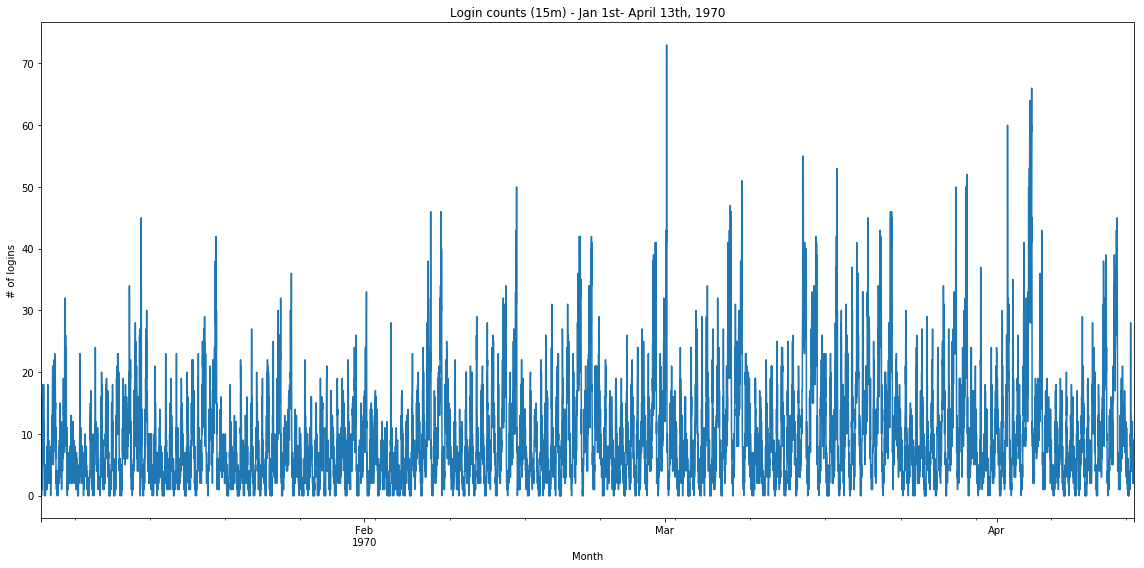

In [6]:
fig, ax = plt.subplots(figsize=(16,8));

data_15min['login_count'].plot(ax=ax);

ax.set_title('Login counts (15m) - Jan 1st- April 13th, 1970');
ax.set_ylabel('# of logins');
ax.set_xlabel('Month');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [7]:
#Hourly data
data_1H = data.resample('1H').sum()

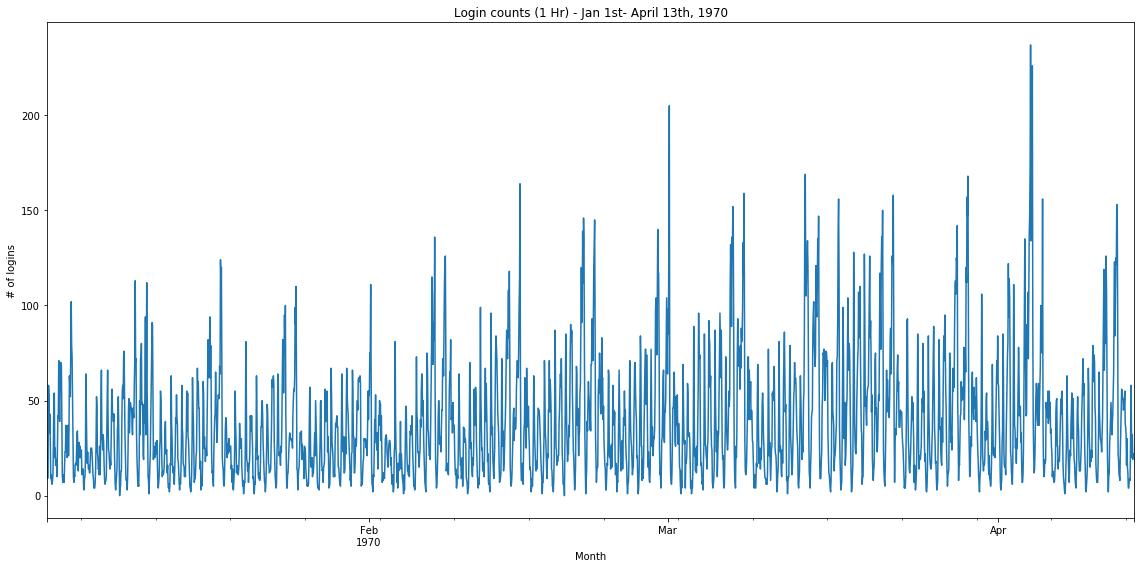

In [15]:
fig, ax = plt.subplots(figsize=(16,8));

data_1H['login_count'].plot(ax=ax);

ax.set_title('Login counts (1 Hr) - Jan 1st- April 13th, 1970');
ax.set_ylabel('# of logins');
ax.set_xlabel('Month');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [9]:

#Hourly data
data_1D = data.resample('1D').sum()

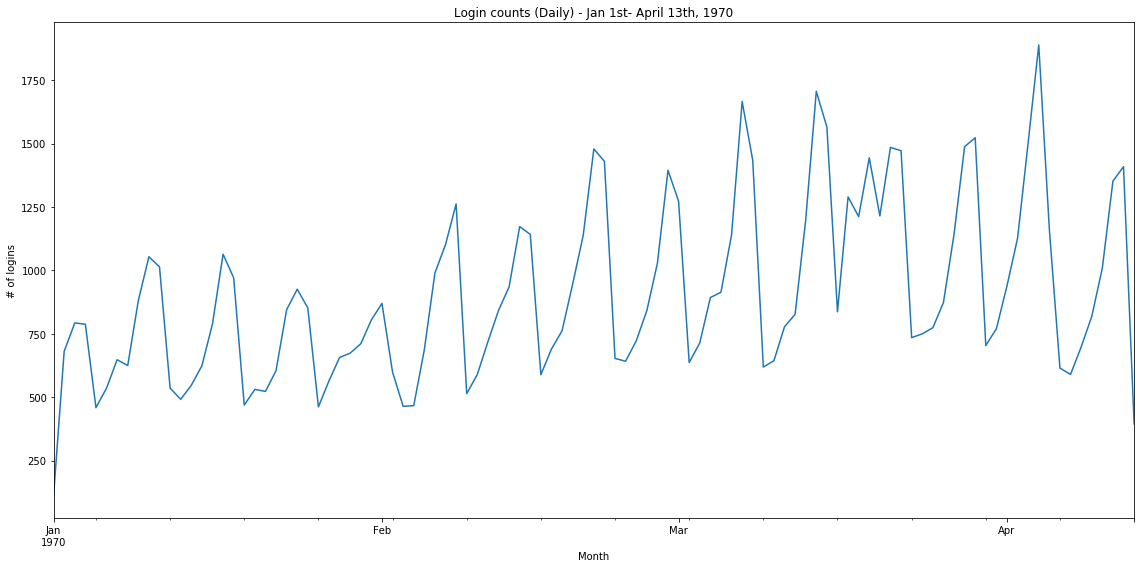

In [16]:
fig, ax = plt.subplots(figsize=(16,8));

data_1D['login_count'].plot(ax=ax);

ax.set_title('Login counts (Daily) - Jan 1st- April 13th, 1970');
ax.set_ylabel('# of logins');
ax.set_xlabel('Month');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [17]:
data['Weekday'] = data.index.day_name()
data_weekday = data.groupby('Weekday').count().loc[['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
print(data_weekday)

           login_count   Hour
Weekday                      
Monday            8823   8823
Tuesday           9268   9268
Wednesday        10339  10339
Thursday         11960  11960
Friday           15208  15208
Saturday         19377  19377
Sunday           18167  18167


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

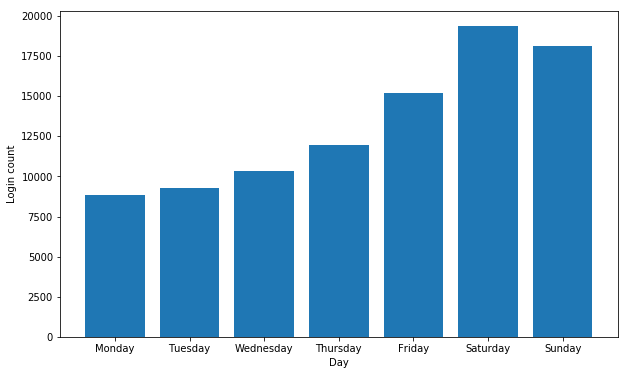

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data_weekday.index, data_weekday.login_count)
ax.set_xlabel('Day')
ax.set_ylabel('Login count')
ax.set_xticklabels(data_weekday.index)

In [13]:
data['Hour'] = data.index.hour
data_hour = data.groupby('Hour').count()
print(data_hour.login_count)

Hour
0     5993
1     6317
2     5800
3     4831
4     5034
5     2945
6     1138
7      815
8      818
9     1527
10    3064
11    5799
12    4964
13    3611
14    3426
15    3038
16    2832
17    2584
18    2980
19    3235
20    4103
21    5623
22    6607
23    6058
Name: login_count, dtype: int64


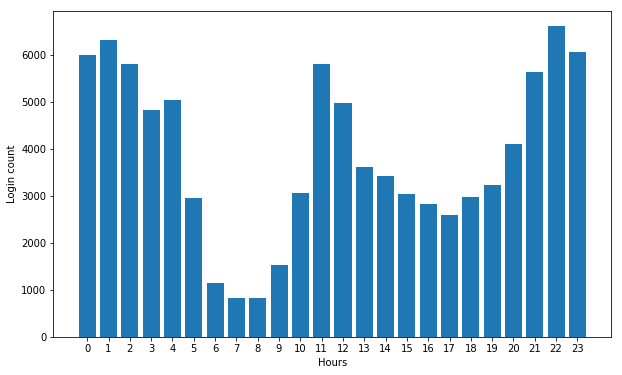

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data_hour.index, data_hour.login_count)
ax.set_xlabel('Hours')
ax.set_ylabel('Login count')
ax.set_xticks([x for x in data_hour.index])
#ax.set_xticklabels(data_hour.index)